In [24]:
import pickle
import os 
import glob
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

with open('../../data/Hazumi_features/Hazumi1911_features.pkl', mode='rb') as f:
    SS_ternary, TS_ternary, sentiment, third_sentiment, persona, third_persona, text, audio,\
    visual, vid = pickle.load(f, encoding='utf-8')

### シングルタスクモデルとマルチタスクモデルの違い1
ユーザごとの性格特性の損失、心象の損失、心象の正解率

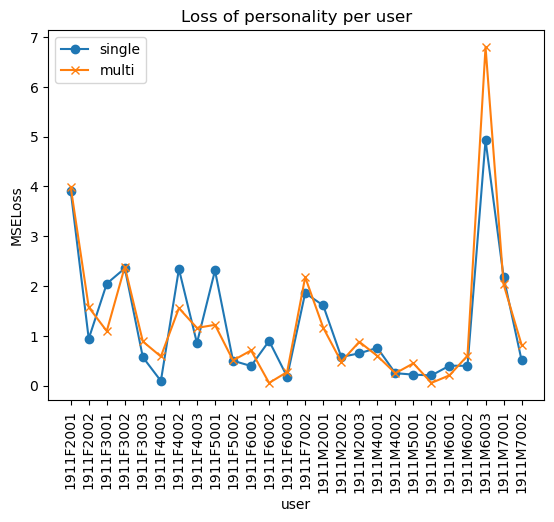

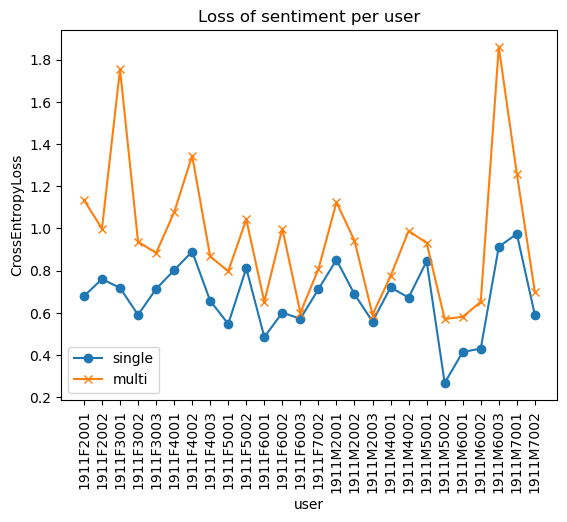

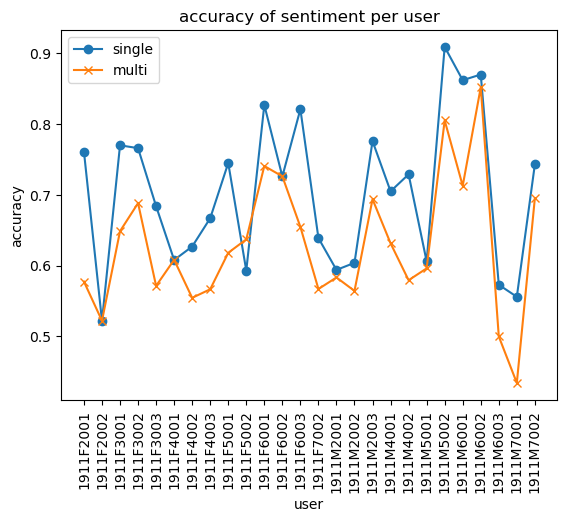

In [14]:


def result_show(single, multi, title, xlabel, ylabel):
    plt.plot(vid, single, label='single', marker='o')
    plt.plot(vid, multi, label='multi', marker='x')
    plt.legend() 
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

single_persona_loss = [3.9169, 0.94, 2.0482, 2.3563, 0.571, 0.0933, 2.341, 0.8541, 2.3127, 0.4995, 0.3928, 0.897, 0.1785, 1.8587, 1.6102, 0.5741, 0.6484, 0.7579, 0.2488, 0.2203, 0.2043, 0.3994, 0.3973, 4.9304, 2.1844, 0.5063]
single_sentiment_loss = [0.6793, 0.7599, 0.7184, 0.5906, 0.7133, 0.8021, 0.8906, 0.6569, 0.5474, 0.8115, 0.4851, 0.601, 0.5719, 0.7123, 0.8515, 0.6885, 0.5587, 0.7203, 0.6723, 0.8443, 0.2678, 0.4143, 0.4305, 0.9131, 0.9742, 0.5905]
single_sentiment_acc = [0.447, 0.506, 0.547, 0.496, 0.375, 0.448, 0.411, 0.442, 0.497, 0.405, 0.566, 0.538, 0.851, 0.524, 0.504, 0.455, 0.521, 0.421, 0.549, 0.516, 0.608, 0.544, 0.616, 0.463, 0.44, 0.548]

multi_persona_loss = [3.9897, 1.5738, 1.0947, 2.387, 0.886, 0.5843, 1.5559, 1.1583, 1.2209, 0.5056, 0.7058, 0.0534, 0.2728, 2.1786, 1.1632, 0.4786, 0.8796, 0.5962, 0.2479, 0.4467, 0.0543, 0.2059, 0.601, 6.8039, 2.0352, 0.8183]
multi_sentiment_loss = [1.1345, 0.9992, 1.7549, 0.9371, 0.8836, 1.0766, 1.3443, 0.8673, 0.7971, 1.043, 0.6529, 0.9995, 0.6004, 0.807, 1.1237, 0.9424, 0.5912, 0.7745, 0.9884, 0.9316, 0.5708, 0.5812, 0.6519, 1.8605, 1.26, 0.6984]
multi_sentiment_acc = 

result_show(single_persona_loss, multi_persona_loss, 'Loss of personality per user', 'user', 'MSELoss')
result_show(single_sentiment_loss, multi_sentiment_loss, 'Loss of sentiment per user', 'user', 'CrossEntropyLoss')
result_show(single_sentiment_acc, multi_sentiment_acc, 'accuracy of sentiment per user', 'user', 'accuracy')

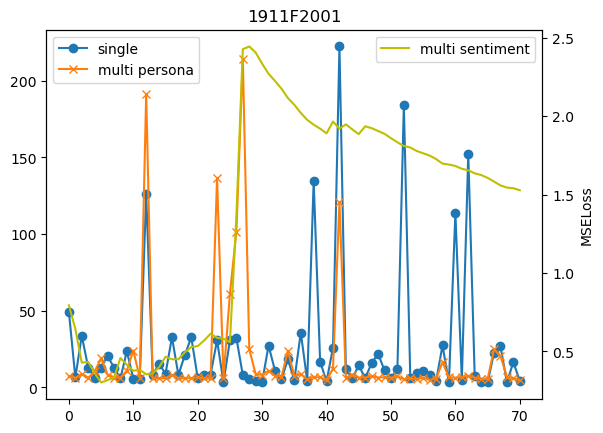

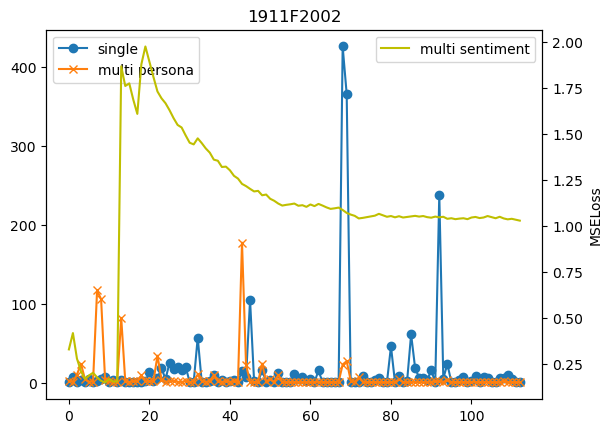

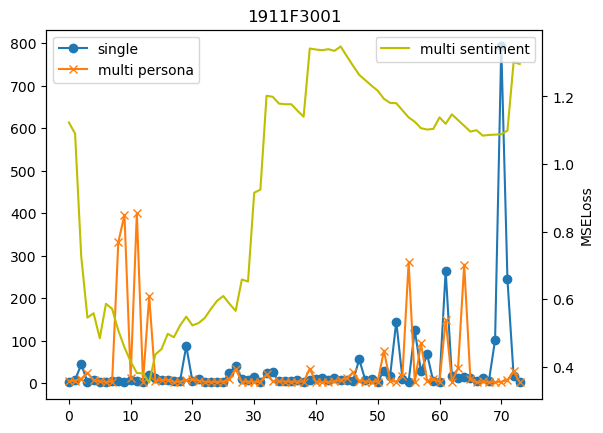

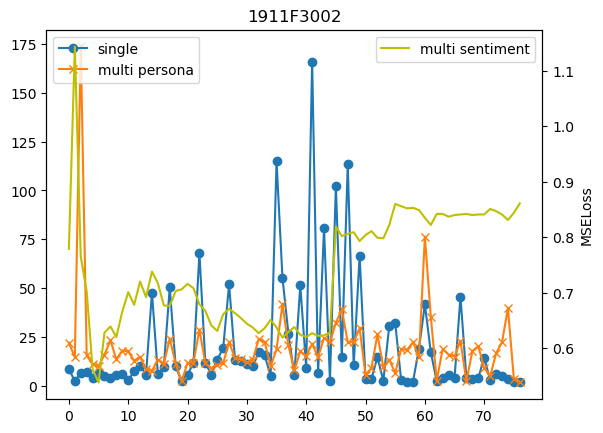

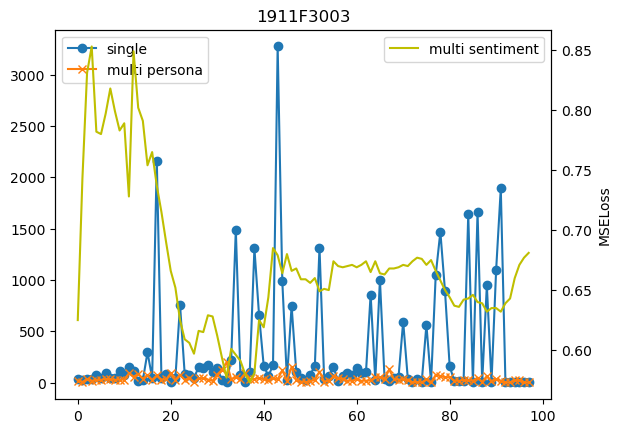

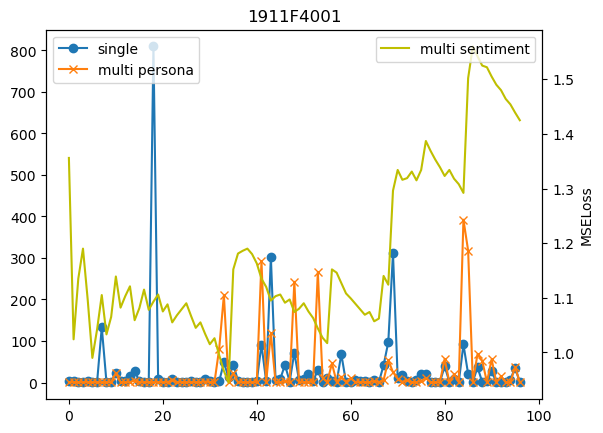

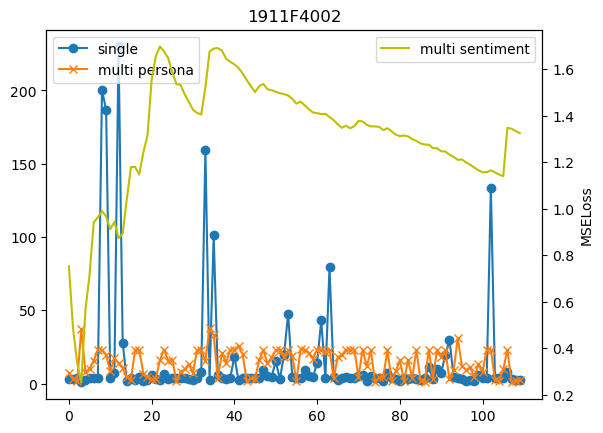

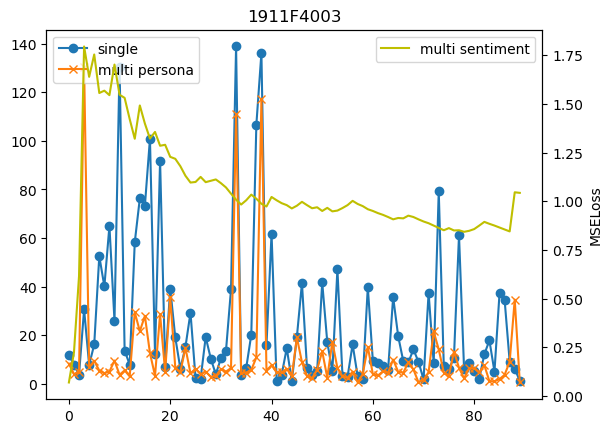

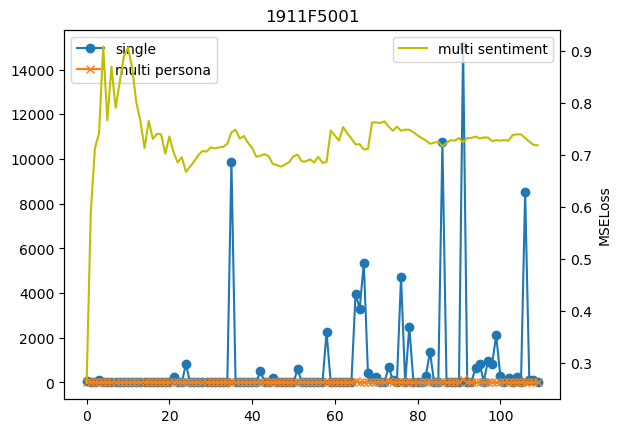

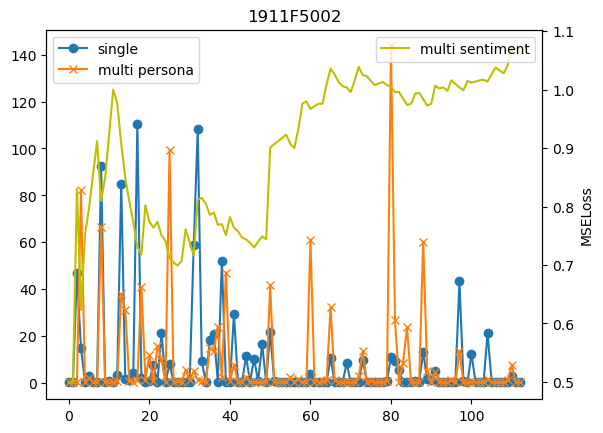

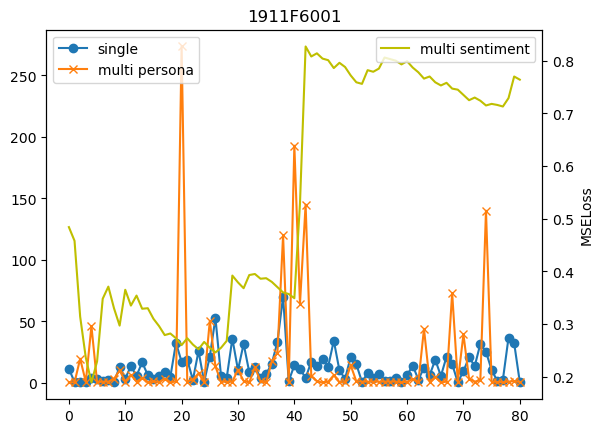

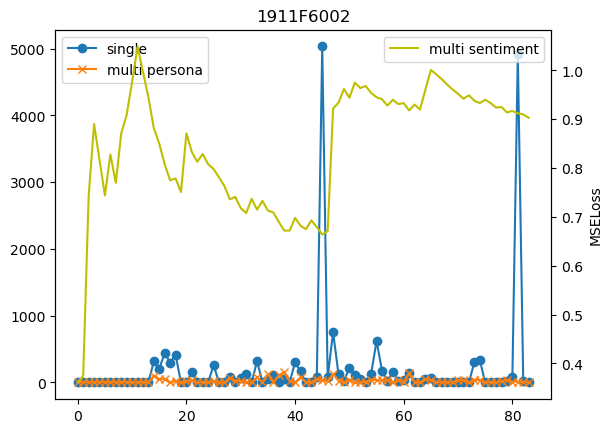

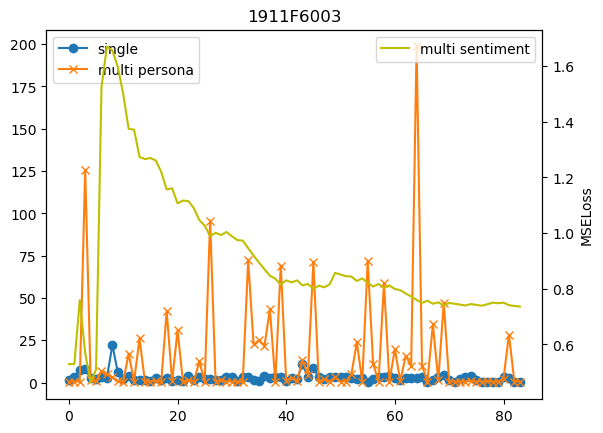

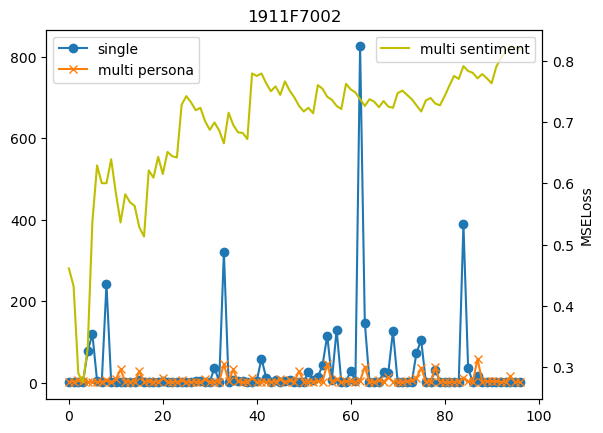

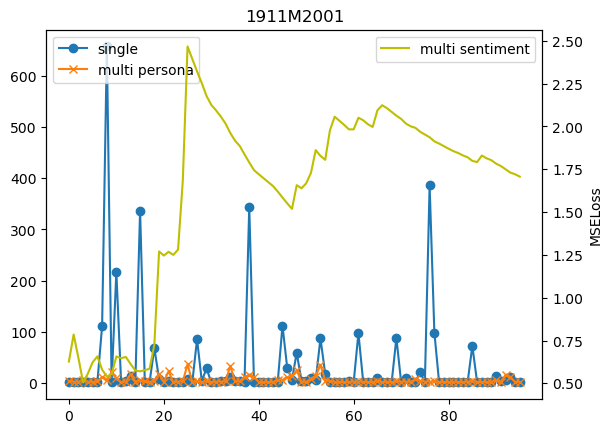

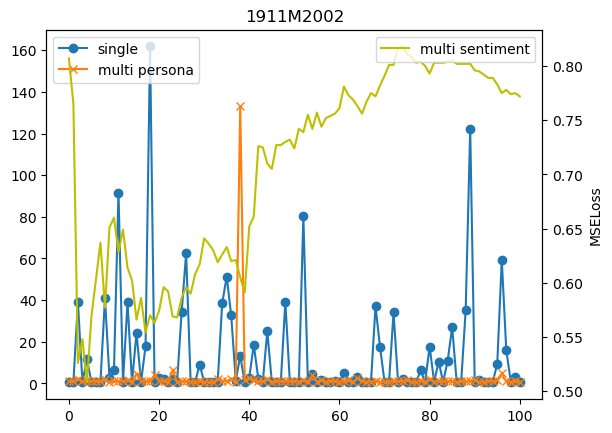

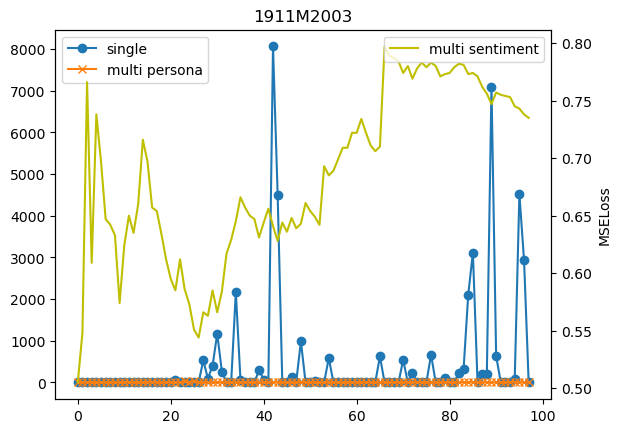

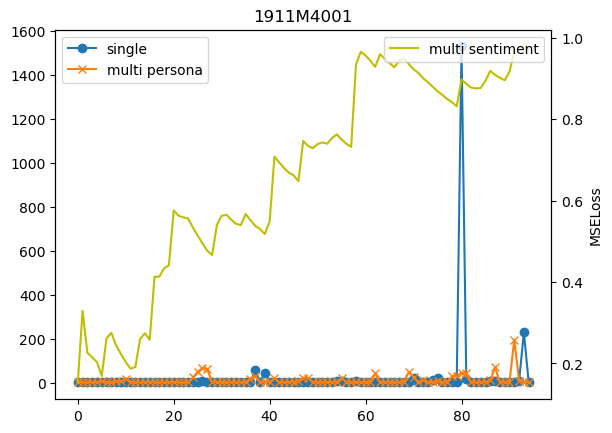

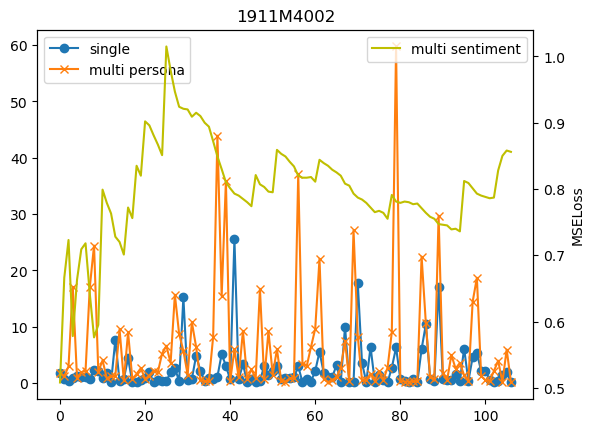

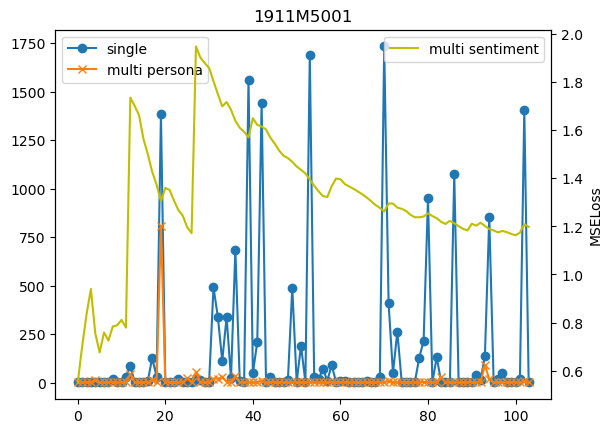

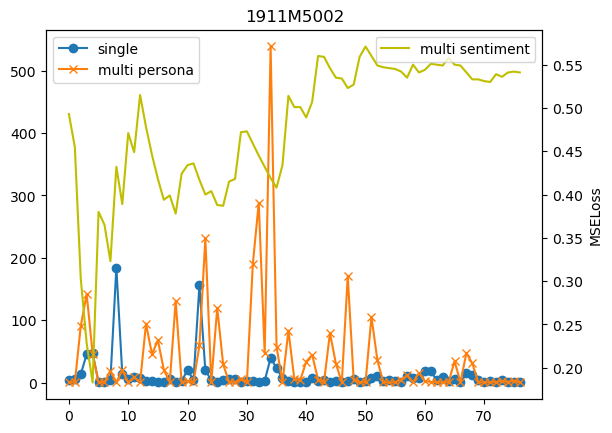

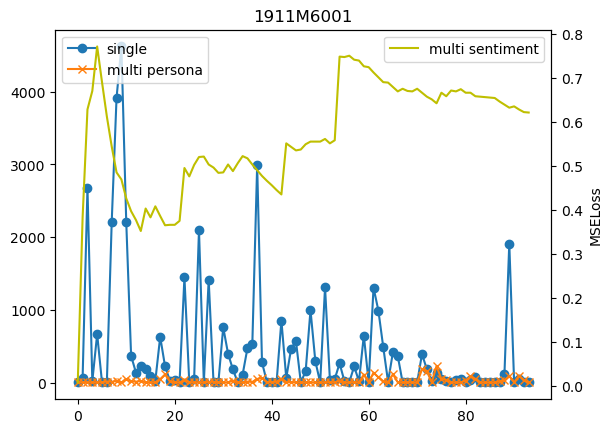

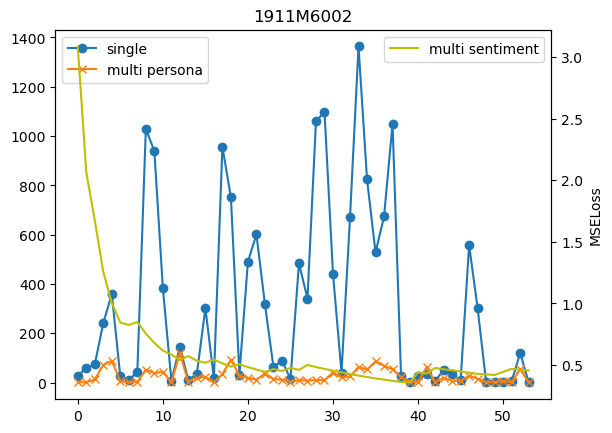

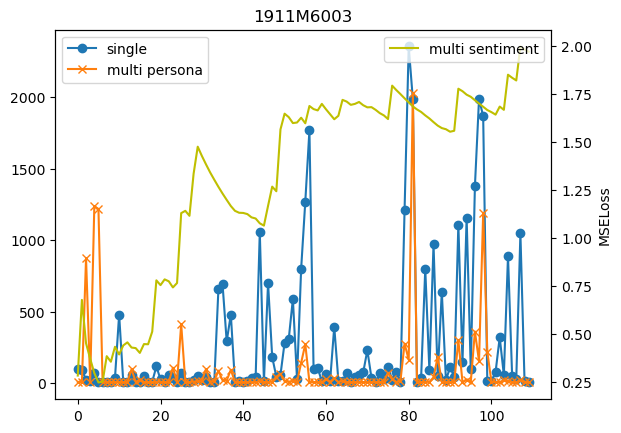

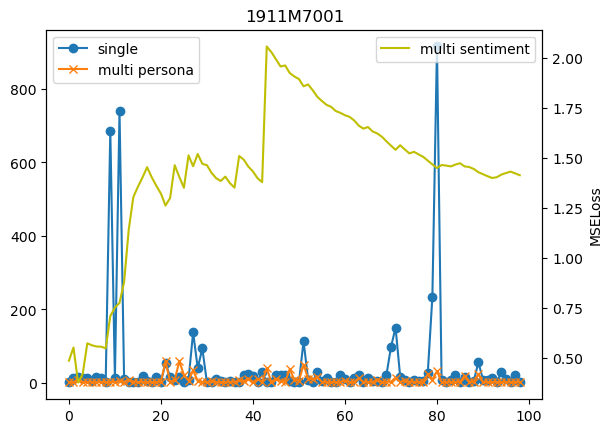

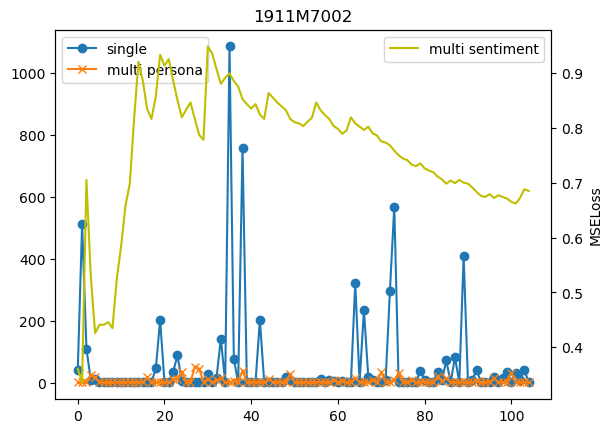

In [46]:
def show_graph(filename, single, multi_persona, multi_sentiment):
    x = list(range(len(single)))
    plt.plot(x, single, label='single', marker='o')
    plt.plot(x, multi_persona, label='multi persona', marker='x')
    plt.plot(x, multi_sentiment, label='multi sentiment')
    plt.legend() 
    plt.title(filename)
    plt.xlabel('utterance')
    plt.ylabel('MSELoss')
    plt.show()

def show_graphv2(filename, single, multi_persona, multi_sentiment):
    fig = plt.figure() 
    ax1 = fig.subplots()
    ax2 = ax1.twinx()

    x = list(range(len(single)))

    ax1.plot(x, single, label='single', marker='o')
    ax1.plot(x, multi_persona, label='multi persona', marker='x')
    ax2.plot(x, multi_sentiment, label='multi sentiment', color='y')
    ax1.legend(loc='upper left') 
    ax2.legend(loc='upper right')
    plt.title(filename)
    plt.xlabel('utterance')
    plt.ylabel('MSELoss')
    plt.show()

testfiles = []
for f in glob.glob('../../data/Hazumi1911/dumpfiles/*.csv'):
    testfiles.append(os.path.splitext(os.path.basename(f))[0])

testfiles = sorted(testfiles)

for i, testfile in enumerate(testfiles):
    with open(f'../../data/results/{testfile}/multi.csv') as f:
        reader = csv.reader(f)
        multi = [row for row in reader]

    with open(f'../../data/results/{testfile}/single.csv') as f:
        reader = csv.reader(f) 
        single = [row for row  in reader]

    
    single = np.array(single[0]).astype(float)
    multi_persona = np.array(multi[0]).astype(float)
    multi_sentiment = np.array(multi[1]).astype(float)

    show_graphv2(testfile, single, multi_persona, multi_sentiment)